In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict


In [139]:
df = pd.read_csv('./pokemonData/Pokemon.csv')
print(f"df length: {len(df)}")
data = pd.read_csv('./pokemonData/Pokemon.csv')
data.head()

df length: 721


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


Accuracy: 22.76%
Classification Report:
              precision    recall  f1-score   support

           1       0.24      0.25      0.24        36
           2       0.21      0.17      0.19        23
           3       0.32      0.36      0.34        25
           4       0.12      0.10      0.11        20
           5       0.24      0.36      0.29        25
           6       0.00      0.00      0.00        16

    accuracy                           0.23       145
   macro avg       0.19      0.21      0.19       145
weighted avg       0.20      0.23      0.21       145



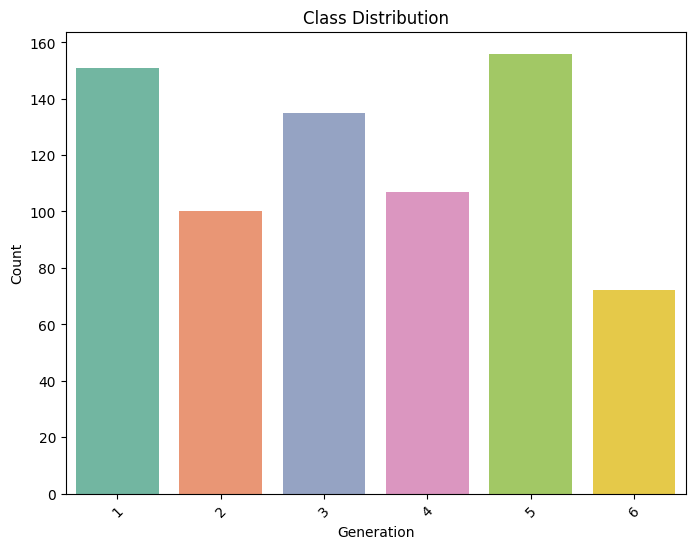

In [145]:
# Split-Testing

# Select features and target
features = data[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
target = data['Generation']

# Encode the target variable
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=[str(x) for x in le.classes_], zero_division=1)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=target, palette='Set2', hue=target, legend=False)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

Accuracy: 21.64%
Classification Report:
              precision    recall  f1-score   support

           1       0.22      0.38      0.28       151
           2       0.17      0.16      0.17       100
           3       0.17      0.14      0.16       135
           4       0.21      0.15      0.17       107
           5       0.31      0.29      0.30       156
           6       0.07      0.04      0.05        72

    accuracy                           0.22       721
   macro avg       0.19      0.19      0.19       721
weighted avg       0.21      0.22      0.21       721



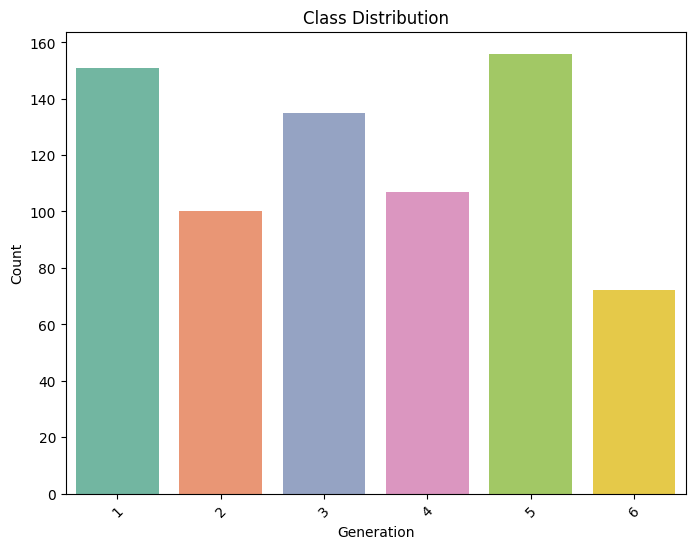

In [146]:
# Stratified Cross-Validation

# Select features and target
features = data[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
target = data['Generation']

# Encode the target variable
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Check the minimum class size
class_counts = np.bincount(target_encoded)
min_class_size = np.min(class_counts)

# Set n_splits based on the minimum class size
n_splits = min(5, min_class_size)

knn = KNeighborsClassifier(n_neighbors=5)

if n_splits > 1:
    skf = StratifiedKFold(n_splits=n_splits)
    cv_scores = cross_val_score(knn, features, target_encoded, cv=skf)

    knn.fit(features, target_encoded)

    # Predict using cross-validation
    y_pred = cross_val_predict(knn, features, target_encoded, cv=skf)
    
    # Evaluate the model
    accuracy = accuracy_score(target_encoded, y_pred)
    report = classification_report(target_encoded, y_pred, target_names=[str(cls) for cls in le.classes_], zero_division=1)

    print(f'Accuracy: {accuracy * 100:.2f}%')
    print('Classification Report:')
    print(report)
else:
    print(f'Not enough data to perform StratifiedKFold with n_splits={n_splits}')
    
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=target, palette='Set2', hue=target, legend=False)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

Iteration 1 Accuracy: 25.52%
Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.48      0.29        25
           2       0.07      0.05      0.06        22
           3       0.26      0.21      0.24        28
           4       0.20      0.08      0.12        24
           5       0.44      0.46      0.45        35
           6       0.00      0.00      0.00        11

    accuracy                           0.26       145
   macro avg       0.20      0.21      0.19       145
weighted avg       0.24      0.26      0.23       145

Iteration 2 Accuracy: 22.76%
Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.32      0.29        38
           2       0.26      0.33      0.29        15
           3       0.23      0.24      0.23        21
           4       0.12      0.09      0.10        22
           5       0.30      0.27      0.29        33
           6       0.00     

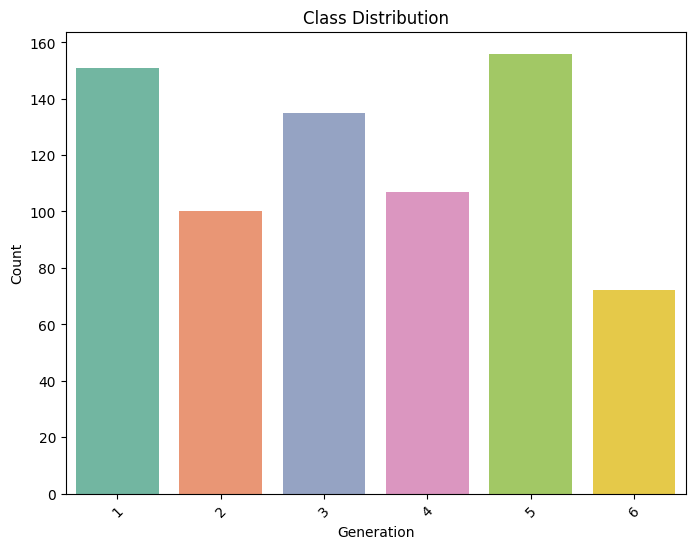

In [147]:
# Robustness-Testing

# Select features and target
features = data[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
target = data['Generation']

# Encode the target variable
le = LabelEncoder()
target_encoded = le.fit_transform(target)

knn = KNeighborsClassifier(n_neighbors=5)

# Parameters for robustness testing
num_iterations = 10
test_size = 0.2
accuracies = []

for i in range(num_iterations):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=test_size, random_state=i)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict the test set results
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    try:
        report = classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_], zero_division=1)
        print(f"Iteration {i+1} Accuracy: {accuracy * 100:.2f}%")
        print('Classification Report:')
        print(report)
    except ValueError as e:
        print(f"Iteration {i+1} skipped due to error: {e}")

# Calculate average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Standard Deviation of Accuracy: {std_accuracy * 100:.2f}%')

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=target, palette='Set2', hue=target, legend=False)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()